# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrUa-1995-2019-07-30.tar.gz
tar -xvf autoriaNumberplateOcrUa-1995-2019-07-30.tar.gz
mv autoriaNumberplateOcrUa-1995-2019-07-30 ua-1995
```
or use your own dataset.

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ua-1995"
VERSION = "2020_08_26_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [5]:
class eu_ua_1995(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'E', 'H', 'I', 'K', 'M', 'O', 'P', 'T', 'X']
        
        self.EPOCHS = 5

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'I', '0', 'A', 'P', '1', 'M', 'E', '5', 'C', 'K', '3', 'T', '6', 'B', 'H', '7', 'X', '2', '4', 'O', '8', '9'}
Letters val  {'I', '0', 'A', 'P', '1', 'M', 'E', '5', 'C', 'K', '3', 'T', '6', 'B', 'H', '7', 'X', '2', '4', 'O', '8', '9'}
Letters test  {'I', '0', 'A', 'P', '1', 'M', 'E', '5', 'C', 'K', '3', 'T', '6', 'B', 'H', '7', 'X', '2', '4', 'O', '8', '9'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


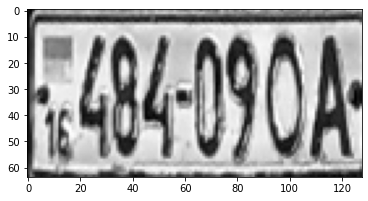

2) the_labels (plate number): 48409OA is encoded as [4, 8, 4, 0, 9, 18, 10]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED


In [6]:
ocrTextDetector = eu_ua_1995()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=0)

In [7]:
model = ocrTextDetector.train(is_random=1)


START TRAINING
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu_ua_1995 (InputLaye [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu_ua_1995[0][0]       
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_______________________________________________________________________

In [8]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 56367KX
True: 			 56567KX

Predicted: 		 09520B
True: 			 09520BB

Predicted: 		 61399EH
True: 			 61399PE

Predicted: 		 06853A
True: 			 06853AA

Predicted: 		 4811IB
True: 			 84811IB

Predicted: 		 725933KB
True: 			 25933KB

Predicted: 		 438013AE
True: 			 43013AE

Predicted: 		 63978BHA
True: 			 6397BHA

Predicted: 		 43498CK
True: 			 43498OK

Predicted: 		 562039CA
True: 			 56039CA

Predicted: 		 65281PE
True: 			 65261PE

Predicted: 		 04653OI
True: 			 04653OT

Predicted: 		 562039CA
True: 			 56039CA

Predicted: 		 75941KB
True: 			 75841KB

Predicted: 		 31856T
True: 			 31856TC

Predicted: 		 88873IX
True: 			 B8873IX

Predicted: 		 34089EB
True: 			 34089BB

Predicted: 		 4990KB
True: 			 46990KB
Test processing time: 0.8514525890350342 seconds
acc: 0.9828734538534729


In [9]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ua-1995_2020_08_26_tensorflow_v2.h5


GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'I', '0', 'A', 'P', '1', 'M', 'E', '5', 'C', 'K', '3', 'T', '6', 'B', 'H', '7', 'X', '2', '4', 'O', '8', '9'}
Letters val  {'I', '0', 'A', 'P', '1', 'M', 'E', '5', 'C', 'K', '3', 'T', '6', 'B', 'H', '7', 'X', '2', '4', 'O', '8', '9'}
Letters test  {'I', '0', 'A', 'P', '1', 'M', 'E', '5', 'C', 'K', '3', 'T', '6', 'B', 'H', '7', 'X', '2', '4', 'O', '8', '9'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


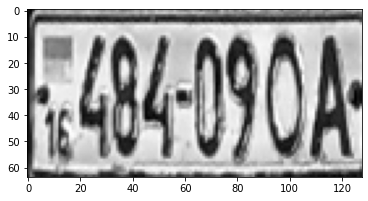

2) the_labels (plate number): 48409OA is encoded as [4, 8, 4, 0, 9, 18, 10]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu_ua_1995 (InputLaye [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu_ua_1995[0][0]       
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________

In [12]:
# Train with aug
ocrTextDetector = eu_ua_1995()
ocrTextDetector.EPOCHS = 1

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [13]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 22858KX
True: 			 22858KT

Predicted: 		 725933KB
True: 			 25933KB

Predicted: 		 63978BHA
True: 			 6397BHA

Predicted: 		 56239CA
True: 			 56039CA

Predicted: 		 99720AHM
True: 			 99720AM

Predicted: 		 65281PE
True: 			 65261PE

Predicted: 		 56239CA
True: 			 56039CA

Predicted: 		 88873IX
True: 			 B8873IX

Predicted: 		 34089EB
True: 			 34089BB
Test processing time: 0.8210446834564209 seconds
acc: 0.9914367269267365


In [14]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ua-1995_2020_08_26_tensorflow_v2.h5
